<a href="https://colab.research.google.com/github/priyankadalmia/medium/blob/main/Model_Explanation_Diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Explanation: Predicting Diabetes

In [47]:
#!pip install -U scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [4]:
diabetes_df = pd.read_csv( "diabetes.csv", index_col=[0] )

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


### Encode the Categorical Variable

In [6]:
X_features = list( diabetes_df.columns )

In [7]:
X_features.remove( "Outcome" )

### Split the dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, \
y_train, y_test = train_test_split( diabetes_df[X_features],
                                    diabetes_df.Outcome,
                                    test_size = 0.3,
                                    random_state = 100 )

In [48]:
X_train.shape, X_test.shape

((537, 7), (231, 7))

### Build a RandomForest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( n_estimators = 100,
                                 max_features = 0.2,
                                 max_depth = 10,
                                 max_samples = 0.5)

In [13]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)

In [14]:
y_pred_prob = rf_clf.predict_proba( X_test )[:,1]
y_pred = rf_clf.predict( X_test )

## Understanding the Model using ELI5

- Install ELI5

```code
pip install eli5
```

In [49]:
#!pip install eli5

In [16]:
import eli5.sklearn

In [17]:
eli5.explain_weights( 
    rf_clf, 
    feature_names = X_features )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Glucose', weight=0.24626814818704465, std=0.0965214316079406, value=None), FeatureWeight(feature='BMI', weight=0.1540980361164891, std=0.0633476577424666, value=None), FeatureWeight(feature='Age', weight=0.1495911713058582, std=0.06586883982380498, value=None), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.1456175535508183, std=0.0533235389933211, value=None), FeatureWeight(feature='BloodPressure', weight=0.11550067391045088, std=0.04020780127460315, value=None), FeatureWeight(feature='SkinThickness', weight=0.09538796479396046, std=0.03969425122614791, value=None), FeatureWeight(feature='Insulin', weight=0.0935364521353785, std=0.04290910218730313, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### Explaining the weights for a Non-diabetes Person

In [18]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [19]:
y_test.iloc[0]

0

In [20]:
eli5.explain_prediction( rf_clf,
                         X_test.iloc[0],
                         target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6518656716417912, std=None, value=1.0), FeatureWeight(feature='Glucose', weight=0.10316672534691716, std=None, value=79.0), FeatureWeight(feature='Age', weight=0.08897655193806987, std=None, value=23.0), FeatureWeight(feature='Insulin', weight=0.07414730554803402, std=None, value=48.0), FeatureWeight(feature='BloodPressure', weight=0.049249077330586144, std=None, value=60.0)], neg=[FeatureWeight(feature='BMI', weight=-0.10841649756477624, std=None, value=43.5), FeatureWeight(feature='SkinThickness', weight=-0.09503252211587224, std=None, value=42.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=-0.05445631212474977, std=None, value=0.6779999999999999)], pos_remaining=0, neg_remaining=0), proba=0.7095, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### Explaining the weights for a diabetes Person

In [50]:
X_test.iloc[8]

Glucose                     196.000
BloodPressure                76.000
SkinThickness                36.000
Insulin                     249.000
BMI                          36.500
DiabetesPedigreeFunction      0.875
Age                          29.000
Name: 1, dtype: float64

In [51]:
y_test.iloc[8]

1

In [52]:
eli5.explain_prediction( rf_clf,
                         X_test.iloc[8],
                         target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.34813432835820884, std=None, value=1.0), FeatureWeight(feature='Glucose', weight=0.18783479887334736, std=None, value=196.0), FeatureWeight(feature='Insulin', weight=0.08787656652774224, std=None, value=249.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.07944940987804125, std=None, value=0.875), FeatureWeight(feature='SkinThickness', weight=0.01816958188082607, std=None, value=36.0), FeatureWeight(feature='BMI', weight=0.013689604286817748, std=None, value=36.5)], neg=[FeatureWeight(feature='Age', weight=-0.012735229333050265, std=None, value=29.0), FeatureWeight(feature='BloodPressure', weight=-0.005307949360822173, std=None, value=76.0)], pos_remaining=0, neg_remaining=0), proba=0.717111111111111, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Partial Dependece Plots (PDPs) 

In [24]:
from sklearn.inspection import PartialDependenceDisplay

### Effect of Insulin on Diabetes

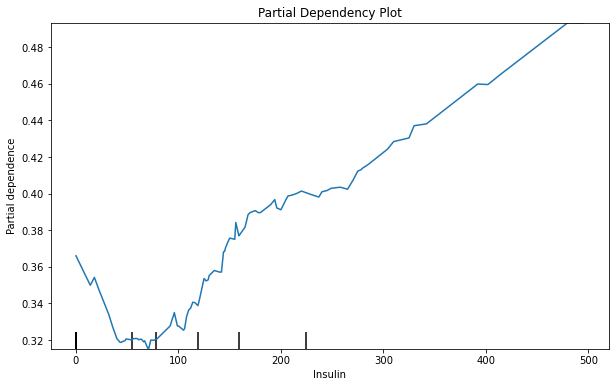

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Insulin'],
                                        feature_names = X_features,
                                        ax = ax);

### Effect of Glucose on Diabetes

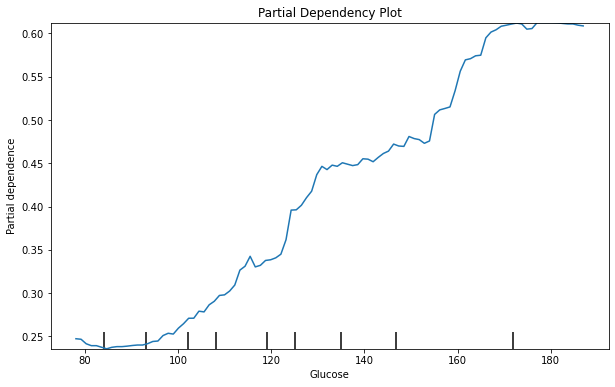

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Glucose'],
                                        feature_names = X_features,
                                        ax = ax)

## LIME - Local Interpretation of Model Explanation

In [55]:
#uncomment to install module
#!pip install lime

In [57]:
import lime
import lime.lime_tabular

In [58]:
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = y_train,                                   
                                   feature_names = X_features, 
                                   class_names = ['Non-diabetes','Diabetes'],
                                   kernel_width=3,
                                   verbose = True ))

### Explaining a case of Non-Diabetes

In [59]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [60]:
exp = explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.3877633707960863
Prediction_local [0.33224481]
Right: 0.2905


In [61]:
exp.show_in_notebook(show_table=True, show_all=False)

### Explaining a case of Diabetes

In [62]:
exp = explainer.explain_instance( X_test.iloc[8].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.23199859968811165
Prediction_local [0.77720999]
Right: 0.717111111111111


In [63]:
exp.show_in_notebook(show_table=True, show_all=False)

### Using Shapley Values

- Install SHAP

<code>
pip install shap
</code>

In [35]:
!pip install shap

     |████████████████████████████████| 436 kB 5.0 MB/s eta 0:00:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [36]:
import shap

### Explaining a case of Non-diabetes

In [71]:
row_to_show = 0
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

array([[0.7095, 0.2905]])

In [72]:
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(data_for_prediction_array)

In [73]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

### Explaining a case of Diabetes

In [70]:
row_to_show = 8
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

### Global Explanation of SHAP

In [41]:
explainer = shap.TreeExplainer( rf_clf )
shap_values = explainer.shap_values( X_train )

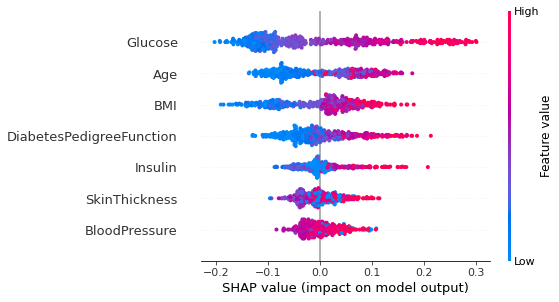

In [42]:
shap.summary_plot( shap_values[1], X_train, plot_type = 'dot' )


In [43]:
explainer.expected_value

array([0.65186567, 0.34813433])

In [44]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 X_train )

### Individual Conditional Expectations (ICE)

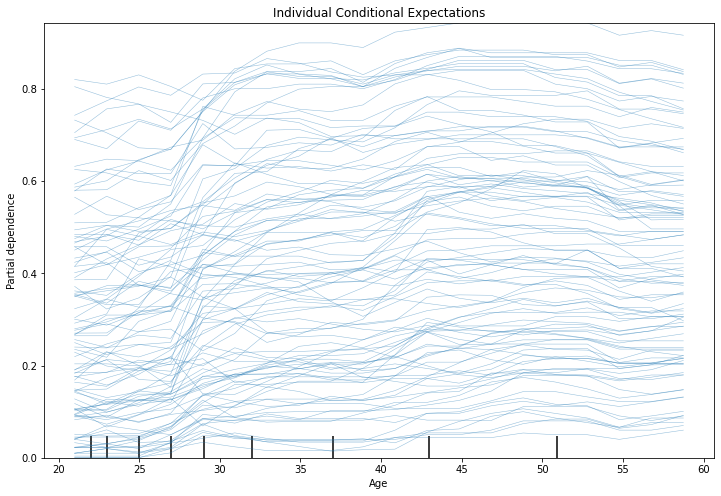

In [45]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

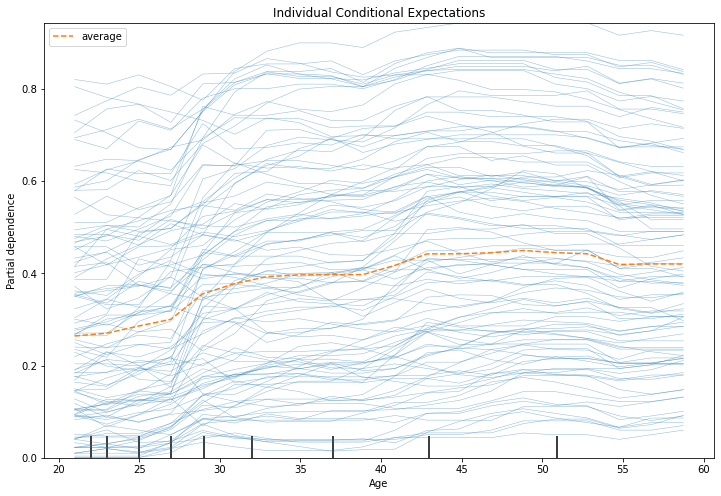

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)